In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cleaned_dataset_final.csv')

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('Persistent',axis=1)
y = df['Persistent']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                    random_state=42)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=1000, learning_rate=1.0)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=1000)

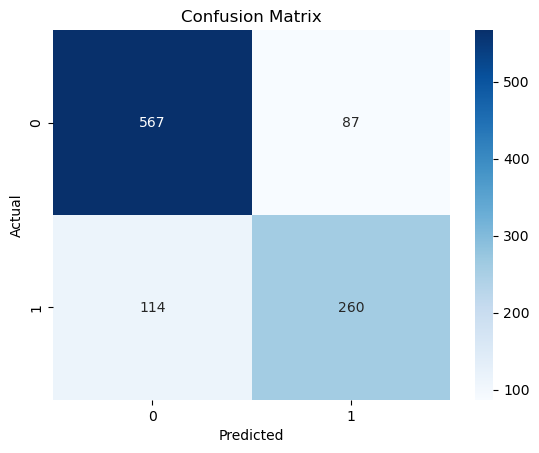

In [11]:
predictions = ada.predict(X_test)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [9]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       654
           1       0.75      0.70      0.72       374

    accuracy                           0.80      1028
   macro avg       0.79      0.78      0.79      1028
weighted avg       0.80      0.80      0.80      1028



In [10]:
from sklearn.metrics import roc_auc_score

y_proba = ada.predict_proba(X_test)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba[:, 1])
print("ROC-AUC score:", roc_auc)


ROC-AUC score: 0.8720420611947864
